In [78]:
#Kütüphaneleri import etme
import joblib
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [79]:
# R²: Modelin genel başarısını değerlendirir. En iyi modelin R²'si 1'e yakın olur.

# MAE: Modelin ortalama mutlak hatalarını gösterir. Düşük değer iyidir.

# RMSE: Modelin hatalarının karelerinin ortalamasının karekökü. Büyük hataları cezalandırır.

In [80]:
#Veriyi indirme
c = pd.read_csv("ogrenci_basari.csv")
df= c.copy()

In [81]:
#Kolonların ismini TÜRKÇE yapma
df.rename(columns = {
    'Hours Studied':'gunluk_calisma_saati',
    'Previous Scores':'onceki_puan',
    'Extracurricular Activities':'ders_disi_etkinlik',
    'Sleep Hours':'uyku_saati',
    'Sample Question Papers Practiced':'cozulen_ornek_sayisi',
    'Performance Index':'yeni_puan'
}, inplace = True)

In [82]:
#Verisetnin ilk 5 satırını inceleme
df.head()

,gunluk_calisma_saati,onceki_puan,ders_disi_etkinlik,uyku_saati,cozulen_ornek_sayisi,yeni_puan
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [83]:
#Verisetinin yapısını anlama
print('Kolonların tipleri:',df.dtypes)
print('-'*80)
print('Kolonlar:\n\n',df.columns)
print('-'*80)
print('Sütun sayısı:',df.shape[0])
print('Kolon sayısı:',df.shape[1])

Kolonların tipleri: gunluk_calisma_saati      int64
onceki_puan               int64
ders_disi_etkinlik       object
uyku_saati                int64
cozulen_ornek_sayisi      int64
yeni_puan               float64
dtype: object
--------------------------------------------------------------------------------
Kolonlar:

 Index(['gunluk_calisma_saati', 'onceki_puan', 'ders_disi_etkinlik',
       'uyku_saati', 'cozulen_ornek_sayisi', 'yeni_puan'],
      dtype='object')
--------------------------------------------------------------------------------
Sütun sayısı: 10000
Kolon sayısı: 6


In [84]:
#Boş değer sayısını kontrol etme
df.isna().sum()

gunluk_calisma_saati    0
onceki_puan             0
ders_disi_etkinlik      0
uyku_saati              0
cozulen_ornek_sayisi    0
yeni_puan               0
dtype: int64

In [85]:
len(df)

10000

In [86]:
#İstatistiksel sonuçlara bakma
print(df.describe())

       gunluk_calisma_saati   onceki_puan    uyku_saati  cozulen_ornek_sayisi  \
count          10000.000000  10000.000000  10000.000000          10000.000000   
mean               4.992900     69.445700      6.530600              4.583300   
std                2.589309     17.343152      1.695863              2.867348   
min                1.000000     40.000000      4.000000              0.000000   
25%                3.000000     54.000000      5.000000              2.000000   
50%                5.000000     69.000000      7.000000              5.000000   
75%                7.000000     85.000000      8.000000              7.000000   
max                9.000000     99.000000      9.000000              9.000000   

          yeni_puan  
count  10000.000000  
mean      55.224800  
std       19.212558  
min       10.000000  
25%       40.000000  
50%       55.000000  
75%       71.000000  
max      100.000000  


In [87]:
#Hedef değişken ile diğer değişkenler arasındaki korelasyon
numeric_df = df.select_dtypes(include='number')
correlation_with_target = numeric_df.corr()['yeni_puan'].sort_values(ascending=False)
print(correlation_with_target)

yeni_puan               1.000000
onceki_puan             0.915189
gunluk_calisma_saati    0.373730
uyku_saati              0.048106
cozulen_ornek_sayisi    0.043268
Name: yeni_puan, dtype: float64


In [88]:
#Uyku saatinin diğer değişkenlere etkisi
uyku_listesi = [4, 5, 6, 7, 8, 9]

for i in uyku_listesi:
    filtered_df = df[df["uyku_saati"] == i]

    numeric_mean = filtered_df.select_dtypes(include='number').mean()

    print(f"Uyku Saati: {i}\n", numeric_mean)
    print('*******************************************************')

Uyku Saati: 4
 gunluk_calisma_saati     4.932057
onceki_puan             69.408894
uyku_saati               4.000000
cozulen_ornek_sayisi     4.547869
yeni_puan               53.794935
dtype: float64
*******************************************************
Uyku Saati: 5
 gunluk_calisma_saati     5.083437
onceki_puan             69.450809
uyku_saati               5.000000
cozulen_ornek_sayisi     4.562889
yeni_puan               54.801370
dtype: float64
*******************************************************
Uyku Saati: 6
 gunluk_calisma_saati     4.964136
onceki_puan             69.203228
uyku_saati               6.000000
cozulen_ornek_sayisi     4.671249
yeni_puan               54.660490
dtype: float64
*******************************************************
Uyku Saati: 7
 gunluk_calisma_saati     5.023866
onceki_puan             69.269690
uyku_saati               7.000000
cozulen_ornek_sayisi     4.517900
yeni_puan               55.278043
dtype: float64
********************************

In [89]:
#Ders dışı etkinliklere karılım oranı
print(df['ders_disi_etkinlik'].value_counts())

ders_disi_etkinlik
No     5052
Yes    4948
Name: count, dtype: int64


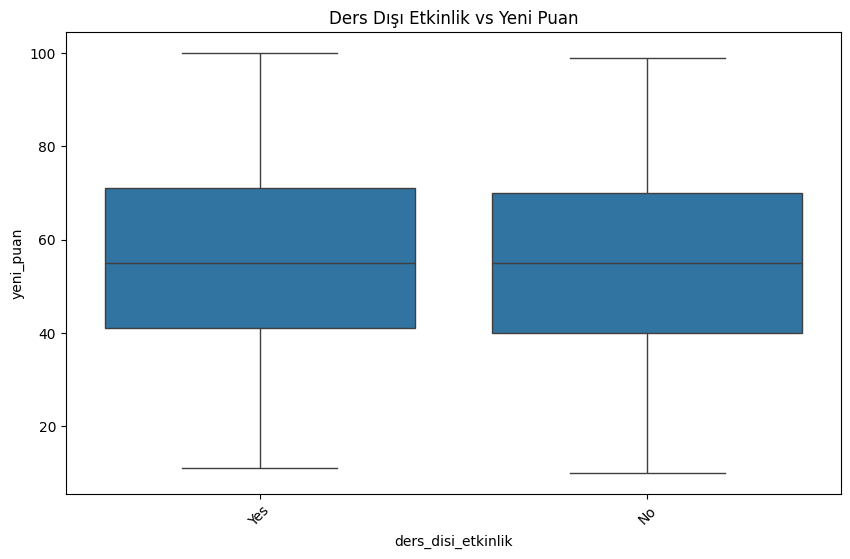

In [90]:
# Ders dışı etkinliklere göre yeni puan
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='ders_disi_etkinlik', y='yeni_puan')
plt.xticks(rotation=45)
plt.title('Ders Dışı Etkinlik vs Yeni Puan')
plt.show()

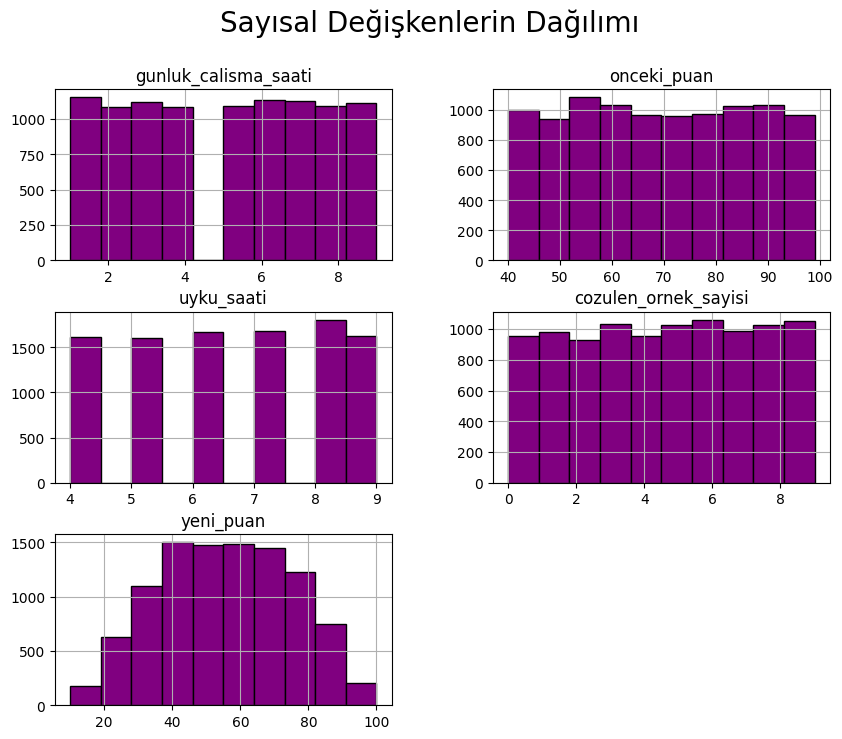

In [91]:
#Sayısal değişkenlerin dağılımı
df.hist(figsize=(10, 8), color='purple', edgecolor='black')
plt.suptitle('Sayısal Değişkenlerin Dağılımı', fontsize=20)
plt.show()

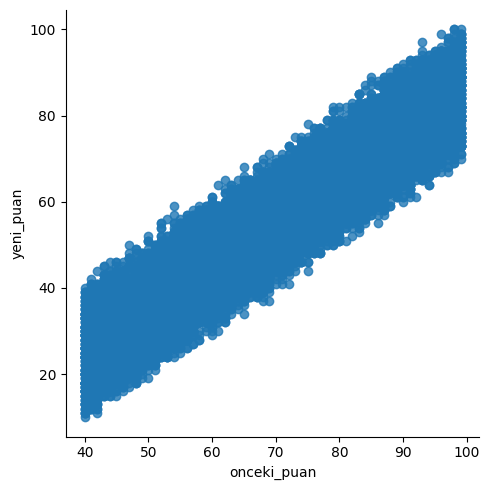

In [92]:
#Önceki puan ve yeni puan arasındaki ilişkiyi gösteren grafik
sns.lmplot(data=df, x='onceki_puan', y='yeni_puan', order=2)  
plt.show()

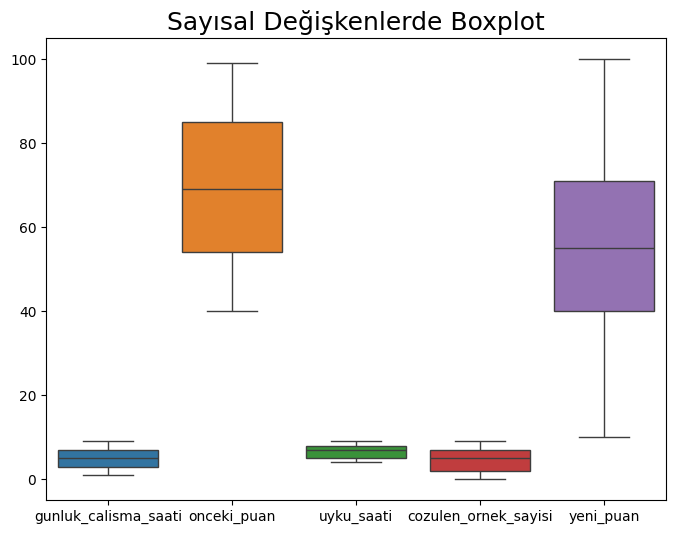

In [93]:
#Sayısal değişkenlerde boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title('Sayısal Değişkenlerde Boxplot', fontsize=18)
plt.show()

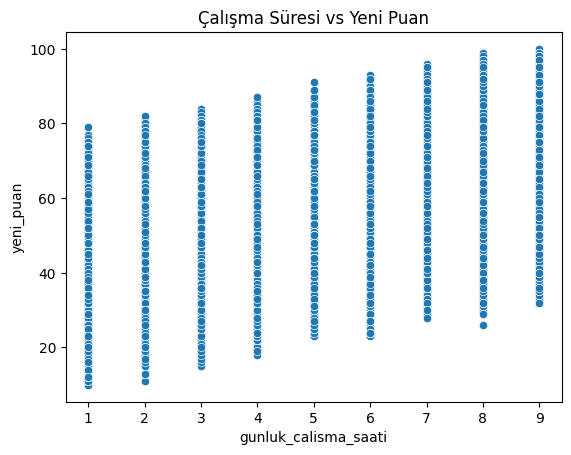

In [94]:
# Çalışma süresi vs yeni puan
sns.scatterplot(data=df, x='gunluk_calisma_saati', y='yeni_puan')
plt.title('Çalışma Süresi vs Yeni Puan')
plt.show()

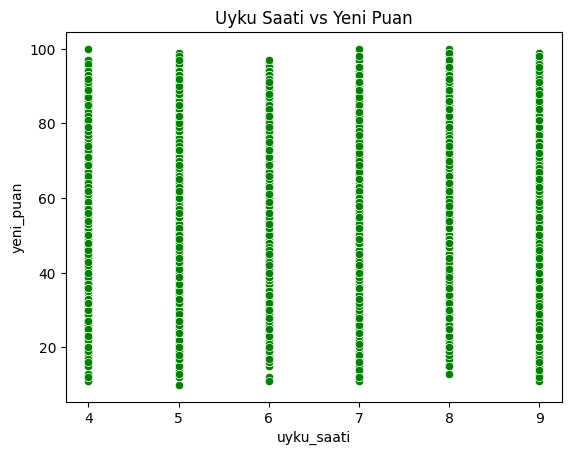

In [95]:
# Uyku vs yeni puan
sns.scatterplot(data=df, x='uyku_saati', y='yeni_puan', color='green')
plt.title('Uyku Saati vs Yeni Puan')
plt.show()

<Axes: >

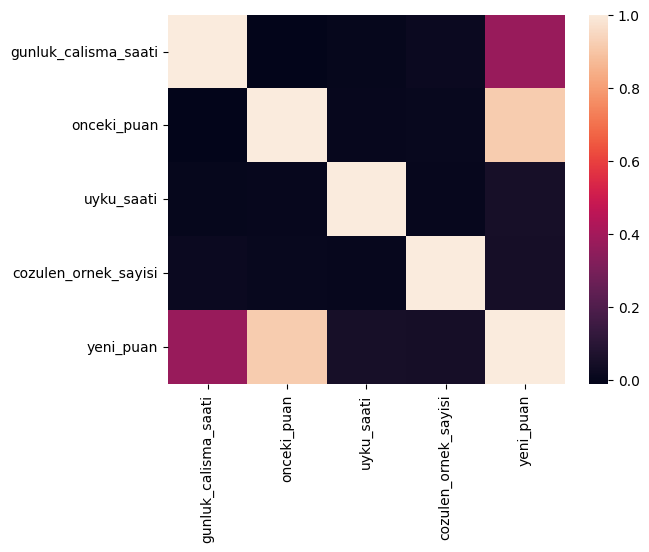

In [96]:
#Isı haritası
sns.heatmap(df.corr(numeric_only=True))

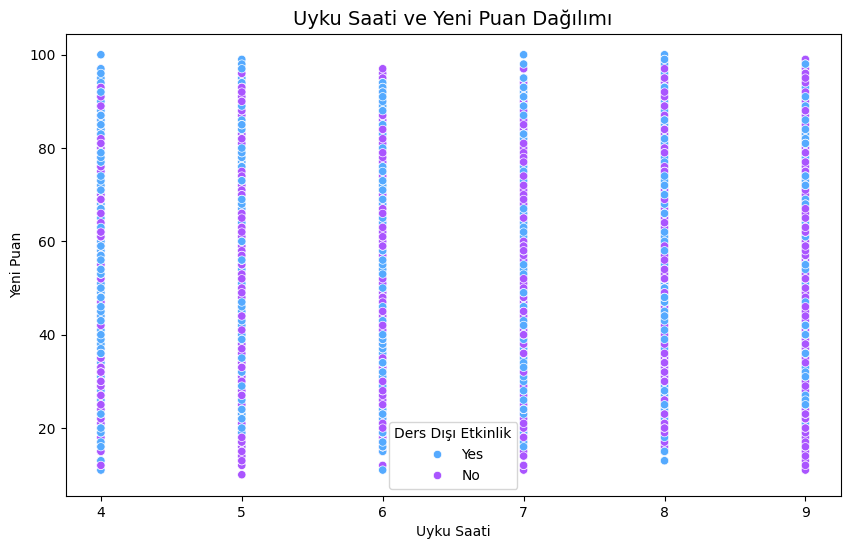

In [97]:
#Uyku saati ile yeni puan arasındaki ilişkiyi, ders dışı etkinlik durumuna göre görselleştiren grafik  

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='uyku_saati', y='yeni_puan', hue='ders_disi_etkinlik', palette='cool')
plt.title('Uyku Saati ve Yeni Puan Dağılımı', fontsize=14)
plt.xlabel('Uyku Saati')
plt.ylabel('Yeni Puan')
plt.legend(title='Ders Dışı Etkinlik')
plt.show()


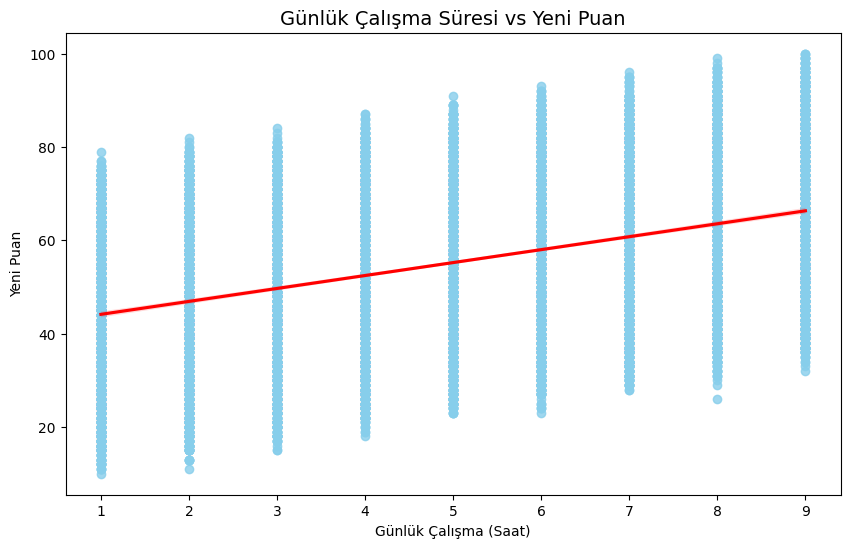

In [98]:
#Günlük Çalışma Süresi vs Yeni Puan
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='gunluk_calisma_saati', y='yeni_puan', scatter_kws={'color':'skyblue'}, line_kws={'color':'red'})
plt.title('Günlük Çalışma Süresi vs Yeni Puan', fontsize=14)
plt.xlabel('Günlük Çalışma (Saat)')
plt.ylabel('Yeni Puan')
plt.show()


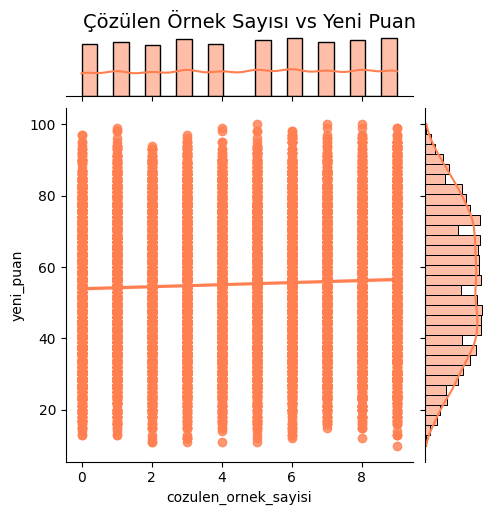

In [99]:
#Çözülen Örnek Sayısı vs Yeni Puan
sns.jointplot(data=df, 
              x='cozulen_ornek_sayisi', 
              y='yeni_puan', 
              kind='reg',     
              height=5,       
              color='coral')  

plt.suptitle('Çözülen Örnek Sayısı vs Yeni Puan', fontsize=14, y=1.02)
plt.show()

In [100]:
df.head()

,gunluk_calisma_saati,onceki_puan,ders_disi_etkinlik,uyku_saati,cozulen_ornek_sayisi,yeni_puan
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [101]:
#Ders dıiı etkinlik sütununu sayısal değere dönüştürme
dict={'Yes':1,'No':0}
df['ders_disi_etkinlik']=df['ders_disi_etkinlik'].map(dict)
df.head()

,gunluk_calisma_saati,onceki_puan,ders_disi_etkinlik,uyku_saati,cozulen_ornek_sayisi,yeni_puan
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [102]:
#Hedef değişken ve bağımlı değişkenleri ayırma
X = df.drop("yeni_puan", axis= 1)
y = df["yeni_puan"]

In [103]:
X.head()

,gunluk_calisma_saati,onceki_puan,ders_disi_etkinlik,uyku_saati,cozulen_ornek_sayisi
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5


In [104]:
y.head()

0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: yeni_puan, dtype: float64

In [105]:
#Test verisini ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [106]:
#Model kurma
reg_model=LinearRegression()

In [107]:
reg_model.fit(X_train, y_train)

LinearRegression()

In [108]:
#Test verisi ile tahmin
reg_test_pred= reg_model.predict(X_test)

In [109]:
reg_test_pred

array([81.2851083 , 71.95146206, 24.79990331, ..., 77.41747564,
       63.50940063, 85.2987713 ])

In [110]:
#Hata oranları
print("R^2 :       ", round(r2_score(y_test,reg_test_pred),2))
print("MAE :       ", round(mean_absolute_error(y_test,reg_test_pred),2))
print("RMSE :      ", round(np.sqrt(mean_squared_error(y_test,reg_test_pred)),2))

R^2 :        0.99
MAE :        1.63
RMSE :       2.04


In [111]:
scaler=StandardScaler()

In [112]:
#Ridge modeli için veriyi standartlaştırma
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [113]:
ridge_model=Ridge()

In [114]:
#Ridge modelin en iyi alpha değerini bulma
params= {
    "alpha":[0.01,0.1,1,5,10,50,100,1000,5000,10000]
}

grid_ridge_model=GridSearchCV(
    estimator=ridge_model,
    param_grid=params,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=2
)

In [115]:
grid_ridge_model.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END .......................................

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 5, 10, 50, 100, 1000, 5000,
                                   10000]},
             scoring='neg_mean_squared_error', verbose=2)

In [116]:
ridge_best = grid_ridge_model.best_estimator_

In [117]:
ridge_preds = ridge_best.predict(X_test_scaled)

In [118]:
#Ridge hata oranları
print("R^2 :       ", round(r2_score(y_test,ridge_preds),2))
print("MAE :       ", round(mean_absolute_error(y_test,ridge_preds),2))
print("RMSE :      ", round(np.sqrt(mean_squared_error(y_test,ridge_preds)),2))

R^2 :        0.99
MAE :        1.63
RMSE :       2.04


In [119]:
#Lasso model
lasso_model=Lasso()

In [120]:
params= {
    "alpha":[0.01,0.1,1,5,10,50,100,1000,5000,10000]
}

grid_lasso_model=GridSearchCV(
    estimator=lasso_model,
    param_grid=params,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=2
)

In [121]:
grid_lasso_model.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END .......................................

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 5, 10, 50, 100, 1000, 5000,
                                   10000]},
             scoring='neg_mean_squared_error', verbose=2)

In [122]:
lasso_best = grid_lasso_model.best_estimator_

In [123]:
lasso_preds=lasso_best.predict(X_test_scaled)

In [124]:
#Lasso hata oranları
print("R^2 :       ", round(r2_score(y_test,lasso_preds),2))
print("MAE :       ", round(mean_absolute_error(y_test,lasso_preds),2))
print("RMSE :      ", round(np.sqrt(mean_squared_error(y_test,lasso_preds)),2))

R^2 :        0.99
MAE :        1.63
RMSE :       2.04


In [125]:
#Elasticnet modeli
elastic_net_model = ElasticNet()

In [126]:
params= {
    "alpha":[0.01,0.1,1,5,10,50,100,1000,5000,10000],
    "l1_ratio":[0.01,0.1,0.5,0.7,0.9,0.95,0.99,1]
}

grid_elastic_net_model=GridSearchCV(
    estimator=elastic_net_model,
    param_grid=params,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=2
)

In [127]:
grid_elastic_net_model.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END ..........................alpha=0.01, l1_ratio=0.01; total time=   0.0s
[CV] END ..........................alpha=0.01, l1_ratio=0.01; total time=   0.0s
[CV] END ..........................alpha=0.01, l1_ratio=0.01; total time=   0.0s
[CV] END ..........................alpha=0.01, l1_ratio=0.01; total time=   0.0s
[CV] END ..........................alpha=0.01, l1_ratio=0.01; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01,

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.1, 1, 5, 10, 50, 100, 1000, 5000,
                                   10000],
                         'l1_ratio': [0.01, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [128]:
elastic_net_best = grid_elastic_net_model.best_estimator_

In [129]:
elastic_net_preds=elastic_net_best.predict(X_test_scaled)

In [130]:
#Elasticnet hata oranları
print("R^2 :       ", round(r2_score(y_test,elastic_net_preds),6))
print("MAE :       ", round(mean_absolute_error(y_test,elastic_net_preds),2))
print("RMSE :      ", round(np.sqrt(mean_squared_error(y_test,elastic_net_preds)),2))

R^2 :        0.988866
MAE :        1.63
RMSE :       2.04


In [131]:
#R^2 oranlarını karşılaştırma
print("reg R^2 :         ", round(r2_score(y_test,reg_test_pred),99))
print("ridge R^2 :       ", round(r2_score(y_test,ridge_preds),99))
print("lasso R^2 :       ", round(r2_score(y_test,lasso_preds),99))
print("elasticnet R^2 :  ", round(r2_score(y_test,elastic_net_preds),99))

reg R^2 :          0.9888694026015643
ridge R^2 :        0.988869398028698
lasso R^2 :        0.9888657406263894
elasticnet R^2 :   0.9888657406263894


In [132]:
feature_names = ["gunluk_calisma_saati", "onceki_puan", "ders_disi_etkinlik", "uyku_saati", "cozulen_ornek_sayisi"]
coef_df = pd.DataFrame({"Degisken": feature_names, "Katsayı": ridge_best.coef_})
print(coef_df)

               Degisken    Katsayı
0  gunluk_calisma_saati   7.411678
1           onceki_puan  17.656984
2    ders_disi_etkinlik   0.312484
3            uyku_saati   0.801652
4  cozulen_ornek_sayisi   0.560977


In [133]:
yeni_ogr = scaler.transform(np.array([8,90,0, 6, 8]).reshape(1, -1))

C:\Users\deniz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [134]:
tahmin = ridge_best.predict(yeni_ogr)
print(f"Tahmini Sonuç: {tahmin[0]}")

Tahmini Sonuç: 84.83075981694881


In [135]:
#Modeli kaydetme (Tekrar tekrar çalışmaması için yorum sastırı içinde)
# model ="ridge_test.pickle"

In [136]:
# pickle.dump(ridge_best,open(model,"wb"))

In [137]:
#Skaleri kaydetme (Tekrar tekrar çalışmaması için yorum sastırı içinde)
# scl="scaler.pickle"

In [138]:
# pickle.dump(scaler,open(scl,"wb"))